In [1]:
# Numpy
import numpy as np
import pandas as pd
%matplotlib nbagg
import matplotlib.pyplot as plt
import scipy.stats

# Machine learning
import tensorflow as tf
import keras
import sklearn
import sklearn.preprocessing, sklearn.base, sklearn.utils
import optunity

# Various Python tricks and libraries
import requests
import time
import operator
import collections
from tqdm import tqdm, tqdm_notebook, trange

/usr/local/lib/python2.7/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# Imports

In [2]:
def r2_score(ytrue, ypred): # sklearn.metrics.r2_score in tensorflow. 1 output only. 

    ytrue_mean = tf.reduce_mean(ytrue, name="ytrue_mean")
    r2_score = tf.subtract(1., tf.truediv(tf.reduce_mean((ytrue - ypred) ** 2), tf.reduce_mean((ytrue - ytrue_mean) ** 2)), name="r2_score")
    return r2_score

class TqdmProgBar(keras.callbacks.Callback):
    def __init__(self, n_epochs, field, fig, ax, label): # logs[field] is updated in tqdm bar and plotted in fig
        self.n_epochs = n_epochs
        self.field = field
        self.fig = fig
        self.ax = ax
        self.label = label
        self.logs = []
    def on_train_begin(self, logs):
        self.pbar = tqdm_notebook(total=self.n_epochs, leave=False)
    def on_train_end(self, logs):
        self.pbar.close()
        self.ax.plot(range(len(self.logs)), self.logs, label=self.label)
        self.ax.set_ylim(bottom=-0.1)
        self.fig.canvas.draw()
        self.ax.legend()
        plt.legend()
    def on_epoch_end(self, epoch, logs):
        self.pbar.set_description("%.2f" %(logs[self.field]))
        self.pbar.update(1)
        self.logs.append(logs[self.field])

# Relive 3D sinR/R

In [3]:
# Get the data
X = np.mgrid[-10:10:1.5, -10:10:1.5, -10:10:1.5].reshape(3, -1).T
R = np.linalg.norm(X, axis=-1)
y = np.sin(np.pi * R) * (1 / R**2 - 2 / R)

df = pd.DataFrame(X, columns=['x1','x2','x3'])
df['y'] = y

# Drop NA
df = df.dropna(axis=0)

# Standard Scaling
df[:] = sklearn.preprocessing.MinMaxScaler(feature_range=(-1,1)).fit_transform(df.copy())

# Outlier removal
df = df[(np.abs(scipy.stats.zscore(df))<3).all(axis=1)]

# Scale again to tidy up
df[:] = sklearn.preprocessing.scale(df.copy())

# back
X = df[['x1', 'x2', 'x3']]
y = df['y']
df['R'] = np.linalg.norm(df.loc[:, ['x1','x2','x3']], axis=-1)

<IPython.core.display.Javascript object>


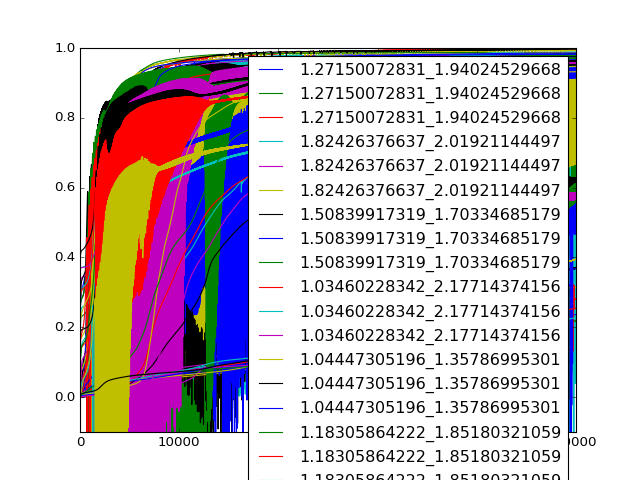

<IPython.core.display.Javascript object>


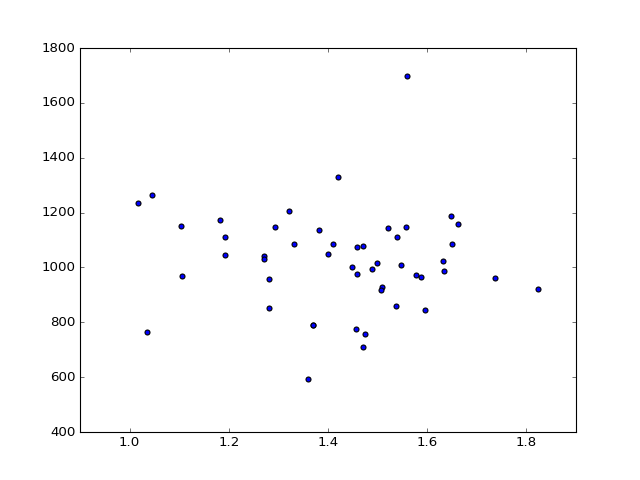

R1 is 1.27150072831, R2 is 1.94024529668, this training set size is 532


HBox(children=(IntProgress(value=0, max=50000), HTML(value=u'')))

R1 is 1.27150072831, R2 is 1.94024529668, this training set size is 1360


/usr/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


HBox(children=(IntProgress(value=0, max=50000), HTML(value=u'')))

R1 is 1.27150072831, R2 is 1.94024529668, this training set size is 832


HBox(children=(IntProgress(value=0, max=50000), HTML(value=u'')))

R1 is 1.82426376637, R2 is 2.01921144497, this training set size is 1620


HBox(children=(IntProgress(value=0, max=50000), HTML(value=u'')))

R1 is 1.82426376637, R2 is 2.01921144497, this training set size is 446


HBox(children=(IntProgress(value=0, max=50000), HTML(value=u'')))

R1 is 1.82426376637, R2 is 2.01921144497, this training set size is 658


HBox(children=(IntProgress(value=0, max=50000), HTML(value=u'')))

R1 is 1.50839917319, R2 is 1.70334685179, this training set size is 948


HBox(children=(IntProgress(value=0, max=50000), HTML(value=u'')))

R1 is 1.50839917319, R2 is 1.70334685179, this training set size is 408


HBox(children=(IntProgress(value=0, max=50000), HTML(value=u'')))

R1 is 1.50839917319, R2 is 1.70334685179, this training set size is 1368


HBox(children=(IntProgress(value=0, max=50000), HTML(value=u'')))

R1 is 1.03460228342, R2 is 2.17714374156, this training set size is 284


HBox(children=(IntProgress(value=0, max=50000), HTML(value=u'')))

R1 is 1.03460228342, R2 is 2.17714374156, this training set size is 2064


HBox(children=(IntProgress(value=0, max=50000), HTML(value=u'')))

R1 is 1.03460228342, R2 is 2.17714374156, this training set size is 376


HBox(children=(IntProgress(value=0, max=50000), HTML(value=u'')))

R1 is 1.04447305196, R2 is 1.35786995301, this training set size is 284


HBox(children=(IntProgress(value=0, max=50000), HTML(value=u'')))

R1 is 1.04447305196, R2 is 1.35786995301, this training set size is 368


HBox(children=(IntProgress(value=0, max=50000), HTML(value=u'')))

R1 is 1.04447305196, R2 is 1.35786995301, this training set size is 2072


HBox(children=(IntProgress(value=0, max=50000), HTML(value=u'')))

R1 is 1.18305864222, R2 is 1.85180321059, this training set size is 460


HBox(children=(IntProgress(value=0, max=50000), HTML(value=u'')))

R1 is 1.18305864222, R2 is 1.85180321059, this training set size is 1256


HBox(children=(IntProgress(value=0, max=50000), HTML(value=u'')))

R1 is 1.18305864222, R2 is 1.85180321059, this training set size is 1008


HBox(children=(IntProgress(value=0, max=50000), HTML(value=u'')))

R1 is 1.10409249392, R2 is 1.42626871851, this training set size is 340


HBox(children=(IntProgress(value=0, max=50000), HTML(value=u'')))

R1 is 1.10409249392, R2 is 1.42626871851, this training set size is 480


HBox(children=(IntProgress(value=0, max=50000), HTML(value=u'')))

R1 is 1.10409249392, R2 is 1.42626871851, this training set size is 1904


HBox(children=(IntProgress(value=0, max=50000), HTML(value=u'')))

R1 is 1.73582168028, R2 is 1.93076935888, this training set size is 1452


HBox(children=(IntProgress(value=0, max=50000), HTML(value=u'')))

R1 is 1.73582168028, R2 is 1.93076935888, this training set size is 440


HBox(children=(IntProgress(value=0, max=50000), HTML(value=u'')))

R1 is 1.73582168028, R2 is 1.93076935888, this training set size is 832


HBox(children=(IntProgress(value=0, max=50000), HTML(value=u'')))

R1 is 1.4199570871, R2 is 1.62312224167, this training set size is 820


HBox(children=(IntProgress(value=0, max=50000), HTML(value=u'')))

R1 is 1.4199570871, R2 is 1.62312224167, this training set size is 368


HBox(children=(IntProgress(value=0, max=50000), HTML(value=u'')))

R1 is 1.4199570871, R2 is 1.62312224167, this training set size is 1536


HBox(children=(IntProgress(value=0, max=50000), HTML(value=u'')))

R1 is 1.01624743564, R2 is 2.08870165547, this training set size is 284


HBox(children=(IntProgress(value=0, max=50000), HTML(value=u'')))

R1 is 1.01624743564, R2 is 2.08870165547, this training set size is 1896


HBox(children=(IntProgress(value=0, max=50000), HTML(value=u'')))

R1 is 1.01624743564, R2 is 2.08870165547, this training set size is 544


HBox(children=(IntProgress(value=0, max=50000), HTML(value=u'')))

R1 is 1.27150072831, R2 is 1.7633611245, this training set size is 532


HBox(children=(IntProgress(value=0, max=50000), HTML(value=u'')))

R1 is 1.27150072831, R2 is 1.7633611245, this training set size is 1016


HBox(children=(IntProgress(value=0, max=50000), HTML(value=u'')))

R1 is 1.27150072831, R2 is 1.7633611245, this training set size is 1176


HBox(children=(IntProgress(value=0, max=50000), HTML(value=u'')))

R1 is 1.19253458001, R2 is 1.50532731764, this training set size is 460


HBox(children=(IntProgress(value=0, max=50000), HTML(value=u'')))

R1 is 1.19253458001, R2 is 1.50532731764, this training set size is 488


HBox(children=(IntProgress(value=0, max=50000), HTML(value=u'')))

R1 is 1.19253458001, R2 is 1.50532731764, this training set size is 1776


HBox(children=(IntProgress(value=0, max=50000), HTML(value=u'')))

R1 is 1.64737959419, R2 is 1.84232727279, this training set size is 1188


HBox(children=(IntProgress(value=0, max=50000), HTML(value=u'')))

R1 is 1.64737959419, R2 is 1.84232727279, this training set size is 528


HBox(children=(IntProgress(value=0, max=50000), HTML(value=u'')))

R1 is 1.64737959419, R2 is 1.84232727279, this training set size is 1008


HBox(children=(IntProgress(value=0, max=50000), HTML(value=u'')))

R1 is 1.33151500101, R2 is 1.54289763155, this training set size is 652


HBox(children=(IntProgress(value=0, max=50000), HTML(value=u'')))

R1 is 1.33151500101, R2 is 1.54289763155, this training set size is 392


HBox(children=(IntProgress(value=0, max=50000), HTML(value=u'')))

R1 is 1.33151500101, R2 is 1.54289763155, this training set size is 1680


HBox(children=(IntProgress(value=0, max=50000), HTML(value=u'')))

R1 is 1.10468952173, R2 is 2.00025956938, this training set size is 340


HBox(children=(IntProgress(value=0, max=50000), HTML(value=u'')))

R1 is 1.10468952173, R2 is 2.00025956938, this training set size is 1720


HBox(children=(IntProgress(value=0, max=50000), HTML(value=u'')))

R1 is 1.10468952173, R2 is 2.00025956938, this training set size is 664


HBox(children=(IntProgress(value=0, max=50000), HTML(value=u'')))

R1 is 1.3599428144, R2 is 1.67491903841, this training set size is 652


HBox(children=(IntProgress(value=0, max=50000), HTML(value=u'')))

R1 is 1.3599428144, R2 is 1.67491903841, this training set size is 656


HBox(children=(IntProgress(value=0, max=50000), HTML(value=u'')))

R1 is 1.3599428144, R2 is 1.67491903841, this training set size is 1416


HBox(children=(IntProgress(value=0, max=50000), HTML(value=u'')))

R1 is 1.2809766661, R2 is 1.59376940373, this training set size is 604


HBox(children=(IntProgress(value=0, max=50000), HTML(value=u'')))

R1 is 1.2809766661, R2 is 1.59376940373, this training set size is 464


HBox(children=(IntProgress(value=0, max=50000), HTML(value=u'')))

R1 is 1.2809766661, R2 is 1.59376940373, this training set size is 1656


HBox(children=(IntProgress(value=0, max=50000), HTML(value=u'')))

R1 is 1.5589375081, R2 is 1.7538851867, this training set size is 1044


HBox(children=(IntProgress(value=0, max=50000), HTML(value=u'')))

R1 is 1.5589375081, R2 is 1.7538851867, this training set size is 408


HBox(children=(IntProgress(value=0, max=50000), HTML(value=u'')))

R1 is 1.5589375081, R2 is 1.7538851867, this training set size is 1272


HBox(children=(IntProgress(value=0, max=50000), HTML(value=u'')))

R1 is 1.32233107877, R2 is 1.47960025331, this training set size is 604


HBox(children=(IntProgress(value=0, max=50000), HTML(value=u'')))

R1 is 1.32233107877, R2 is 1.47960025331, this training set size is 288


HBox(children=(IntProgress(value=0, max=50000), HTML(value=u'')))

R1 is 1.32233107877, R2 is 1.47960025331, this training set size is 1832


HBox(children=(IntProgress(value=0, max=50000), HTML(value=u'')))

R1 is 1.40100521151, R2 is 1.6338566413, this training set size is 700


HBox(children=(IntProgress(value=0, max=50000), HTML(value=u'')))

R1 is 1.40100521151, R2 is 1.6338566413, this training set size is 488


HBox(children=(IntProgress(value=0, max=50000), HTML(value=u'')))

R1 is 1.40100521151, R2 is 1.6338566413, this training set size is 1536


HBox(children=(IntProgress(value=0, max=50000), HTML(value=u'')))

R1 is 1.19313160782, R2 is 1.91181748329, this training set size is 460


HBox(children=(IntProgress(value=0, max=50000), HTML(value=u'')))

R1 is 1.19313160782, R2 is 1.91181748329, this training set size is 1352


HBox(children=(IntProgress(value=0, max=50000), HTML(value=u'')))

R1 is 1.19313160782, R2 is 1.91181748329, this training set size is 912


HBox(children=(IntProgress(value=0, max=50000), HTML(value=u'')))

R1 is 1.29290061067, R2 is 1.47133185226, this training set size is 604


HBox(children=(IntProgress(value=0, max=50000), HTML(value=u'')))

R1 is 1.29290061067, R2 is 1.47133185226, this training set size is 288


HBox(children=(IntProgress(value=0, max=50000), HTML(value=u'')))

R1 is 1.29290061067, R2 is 1.47133185226, this training set size is 1832


HBox(children=(IntProgress(value=0, max=50000), HTML(value=u'')))

R1 is 1.44838490049, R2 is 1.65462843576, this training set size is 820


HBox(children=(IntProgress(value=0, max=50000), HTML(value=u'')))

R1 is 1.44838490049, R2 is 1.65462843576, this training set size is 488


HBox(children=(IntProgress(value=0, max=50000), HTML(value=u'')))

R1 is 1.44838490049, R2 is 1.65462843576, this training set size is 1416


HBox(children=(IntProgress(value=0, max=50000), HTML(value=u'')))

R1 is 1.36941875219, R2 is 1.68221148982, this training set size is 652


HBox(children=(IntProgress(value=0, max=50000), HTML(value=u'')))

R1 is 1.36941875219, R2 is 1.68221148982, this training set size is 656


HBox(children=(IntProgress(value=0, max=50000), HTML(value=u'')))

R1 is 1.36941875219, R2 is 1.68221148982, this training set size is 1416


HBox(children=(IntProgress(value=0, max=50000), HTML(value=u'')))

R1 is 1.47049542201, R2 is 1.66544310061, this training set size is 892


HBox(children=(IntProgress(value=0, max=50000), HTML(value=u'')))

R1 is 1.47049542201, R2 is 1.66544310061, this training set size is 416


HBox(children=(IntProgress(value=0, max=50000), HTML(value=u'')))

R1 is 1.47049542201, R2 is 1.66544310061, this training set size is 1416


HBox(children=(IntProgress(value=0, max=50000), HTML(value=u'')))

R1 is 1.41077316486, R2 is 1.5680423394, this training set size is 700


HBox(children=(IntProgress(value=0, max=50000), HTML(value=u'')))

R1 is 1.41077316486, R2 is 1.5680423394, this training set size is 344


HBox(children=(IntProgress(value=0, max=50000), HTML(value=u'')))

R1 is 1.41077316486, R2 is 1.5680423394, this training set size is 1680


HBox(children=(IntProgress(value=0, max=50000), HTML(value=u'')))

R1 is 1.4894472976, R2 is 1.72229872739, this training set size is 892


HBox(children=(IntProgress(value=0, max=50000), HTML(value=u'')))

R1 is 1.4894472976, R2 is 1.72229872739, this training set size is 464


HBox(children=(IntProgress(value=0, max=50000), HTML(value=u'')))

R1 is 1.4894472976, R2 is 1.72229872739, this training set size is 1368


HBox(children=(IntProgress(value=0, max=50000), HTML(value=u'')))

R1 is 1.28157369391, R2 is 1.8233753972, this training set size is 604


HBox(children=(IntProgress(value=0, max=50000), HTML(value=u'')))

R1 is 1.28157369391, R2 is 1.8233753972, this training set size is 1016


HBox(children=(IntProgress(value=0, max=50000), HTML(value=u'')))

R1 is 1.28157369391, R2 is 1.8233753972, this training set size is 1104


HBox(children=(IntProgress(value=0, max=50000), HTML(value=u'')))

R1 is 1.38134269676, R2 is 1.55977393835, this training set size is 700


HBox(children=(IntProgress(value=0, max=50000), HTML(value=u'')))

R1 is 1.38134269676, R2 is 1.55977393835, this training set size is 344


HBox(children=(IntProgress(value=0, max=50000), HTML(value=u'')))

R1 is 1.38134269676, R2 is 1.55977393835, this training set size is 1680


HBox(children=(IntProgress(value=0, max=50000), HTML(value=u'')))

R1 is 1.53682698658, R2 is 1.66028873146, this training set size is 948


HBox(children=(IntProgress(value=0, max=50000), HTML(value=u'')))

R1 is 1.53682698658, R2 is 1.66028873146, this training set size is 360


HBox(children=(IntProgress(value=0, max=50000), HTML(value=u'')))

R1 is 1.53682698658, R2 is 1.66028873146, this training set size is 1416


HBox(children=(IntProgress(value=0, max=50000), HTML(value=u'')))

R1 is 1.45786083828, R2 is 1.77065357591, this training set size is 892


HBox(children=(IntProgress(value=0, max=50000), HTML(value=u'')))

R1 is 1.45786083828, R2 is 1.77065357591, this training set size is 656


HBox(children=(IntProgress(value=0, max=50000), HTML(value=u'')))

R1 is 1.45786083828, R2 is 1.77065357591, this training set size is 1176


HBox(children=(IntProgress(value=0, max=50000), HTML(value=u'')))

R1 is 1.4566282105, R2 is 1.61654836796, this training set size is 820


HBox(children=(IntProgress(value=0, max=50000), HTML(value=u'')))

R1 is 1.4566282105, R2 is 1.61654836796, this training set size is 329


HBox(children=(IntProgress(value=0, max=50000), HTML(value=u'')))

R1 is 1.4566282105, R2 is 1.61654836796, this training set size is 1575


HBox(children=(IntProgress(value=0, max=50000), HTML(value=u'')))

R1 is 1.49921525095, R2 is 1.65648442549, this training set size is 947


HBox(children=(IntProgress(value=0, max=50000), HTML(value=u'')))

R1 is 1.49921525095, R2 is 1.65648442549, this training set size is 361


HBox(children=(IntProgress(value=0, max=50000), HTML(value=u'')))

R1 is 1.49921525095, R2 is 1.65648442549, this training set size is 1416


HBox(children=(IntProgress(value=0, max=50000), HTML(value=u'')))

R1 is 1.53998563251, R2 is 1.76289625358, this training set size is 1044


HBox(children=(IntProgress(value=0, max=50000), HTML(value=u'')))

R1 is 1.53998563251, R2 is 1.76289625358, this training set size is 504


HBox(children=(IntProgress(value=0, max=50000), HTML(value=u'')))

R1 is 1.53998563251, R2 is 1.76289625358, this training set size is 1176


HBox(children=(IntProgress(value=0, max=50000), HTML(value=u'')))

R1 is 1.57788938369, R2 is 1.81074081348, this training set size is 1050


HBox(children=(IntProgress(value=0, max=50000), HTML(value=u'')))

R1 is 1.57788938369, R2 is 1.81074081348, this training set size is 570


HBox(children=(IntProgress(value=0, max=50000), HTML(value=u'')))

R1 is 1.57788938369, R2 is 1.81074081348, this training set size is 1104


HBox(children=(IntProgress(value=0, max=50000), HTML(value=u'')))

R1 is 1.37001578, R2 is 1.73493331111, this training set size is 652


HBox(children=(IntProgress(value=0, max=50000), HTML(value=u'')))

R1 is 1.37001578, R2 is 1.73493331111, this training set size is 800


HBox(children=(IntProgress(value=0, max=50000), HTML(value=u'')))

R1 is 1.37001578, R2 is 1.73493331111, this training set size is 1272


HBox(children=(IntProgress(value=0, max=50000), HTML(value=u'')))

R1 is 1.46978478285, R2 is 1.64821602444, this training set size is 892


HBox(children=(IntProgress(value=0, max=50000), HTML(value=u'')))

R1 is 1.46978478285, R2 is 1.64821602444, this training set size is 296


HBox(children=(IntProgress(value=0, max=50000), HTML(value=u'')))

R1 is 1.46978478285, R2 is 1.64821602444, this training set size is 1536


HBox(children=(IntProgress(value=0, max=50000), HTML(value=u'')))

R1 is 1.54630292437, R2 is 1.8466329851, this training set size is 1044


HBox(children=(IntProgress(value=0, max=50000), HTML(value=u'')))

R1 is 1.54630292437, R2 is 1.8466329851, this training set size is 672


HBox(children=(IntProgress(value=0, max=50000), HTML(value=u'')))

R1 is 1.54630292437, R2 is 1.8466329851, this training set size is 1008


HBox(children=(IntProgress(value=0, max=50000), HTML(value=u'')))

R1 is 1.50732551677, R2 is 1.70499045405, this training set size is 948


HBox(children=(IntProgress(value=0, max=50000), HTML(value=u'')))

R1 is 1.50732551677, R2 is 1.70499045405, this training set size is 408


HBox(children=(IntProgress(value=0, max=50000), HTML(value=u'')))

R1 is 1.50732551677, R2 is 1.70499045405, this training set size is 1368


HBox(children=(IntProgress(value=0, max=50000), HTML(value=u'')))

R1 is 1.58765733704, R2 is 1.74492651158, this training set size is 1068


HBox(children=(IntProgress(value=0, max=50000), HTML(value=u'')))

R1 is 1.58765733704, R2 is 1.74492651158, this training set size is 384


HBox(children=(IntProgress(value=0, max=50000), HTML(value=u'')))

R1 is 1.58765733704, R2 is 1.74492651158, this training set size is 1272


HBox(children=(IntProgress(value=0, max=50000), HTML(value=u'')))

R1 is 1.47518507753, R2 is 1.85083772751, this training set size is 892


HBox(children=(IntProgress(value=0, max=50000), HTML(value=u'')))

R1 is 1.47518507753, R2 is 1.85083772751, this training set size is 824


HBox(children=(IntProgress(value=0, max=50000), HTML(value=u'')))

R1 is 1.47518507753, R2 is 1.85083772751, this training set size is 1008


HBox(children=(IntProgress(value=0, max=50000), HTML(value=u'')))

R1 is 1.66295286766, R2 is 1.85692003804, this training set size is 1308


HBox(children=(IntProgress(value=0, max=50000), HTML(value=u'')))

R1 is 1.66295286766, R2 is 1.85692003804, this training set size is 408


HBox(children=(IntProgress(value=0, max=50000), HTML(value=u'')))

R1 is 1.66295286766, R2 is 1.85692003804, this training set size is 1008


HBox(children=(IntProgress(value=0, max=50000), HTML(value=u'')))

R1 is 1.45845786609, R2 is 1.66869803508, this training set size is 892


HBox(children=(IntProgress(value=0, max=50000), HTML(value=u'')))

R1 is 1.45845786609, R2 is 1.66869803508, this training set size is 416


HBox(children=(IntProgress(value=0, max=50000), HTML(value=u'')))

R1 is 1.45845786609, R2 is 1.66869803508, this training set size is 1416


HBox(children=(IntProgress(value=0, max=50000), HTML(value=u'')))

R1 is 1.55822686894, R2 is 1.73665811053, this training set size is 1044


HBox(children=(IntProgress(value=0, max=50000), HTML(value=u'')))

R1 is 1.55822686894, R2 is 1.73665811053, this training set size is 408


HBox(children=(IntProgress(value=0, max=50000), HTML(value=u'')))

R1 is 1.55822686894, R2 is 1.73665811053, this training set size is 1272


HBox(children=(IntProgress(value=0, max=50000), HTML(value=u'')))

R1 is 1.64978398833, R2 is 1.83717290364, this training set size is 1188


HBox(children=(IntProgress(value=0, max=50000), HTML(value=u'')))

R1 is 1.64978398833, R2 is 1.83717290364, this training set size is 528


HBox(children=(IntProgress(value=0, max=50000), HTML(value=u'')))

R1 is 1.64978398833, R2 is 1.83717290364, this training set size is 1008


HBox(children=(IntProgress(value=0, max=50000), HTML(value=u'')))

R1 is 1.63474501046, R2 is 1.8340052993, this training set size is 1188


HBox(children=(IntProgress(value=0, max=50000), HTML(value=u'')))

R1 is 1.63474501046, R2 is 1.8340052993, this training set size is 528


HBox(children=(IntProgress(value=0, max=50000), HTML(value=u'')))

R1 is 1.63474501046, R2 is 1.8340052993, this training set size is 1008


HBox(children=(IntProgress(value=0, max=50000), HTML(value=u'')))

R1 is 1.59576760286, R2 is 1.79343254014, this training set size is 1068


HBox(children=(IntProgress(value=0, max=50000), HTML(value=u'')))

R1 is 1.59576760286, R2 is 1.79343254014, this training set size is 480


HBox(children=(IntProgress(value=0, max=50000), HTML(value=u'')))

R1 is 1.59576760286, R2 is 1.79343254014, this training set size is 1176


HBox(children=(IntProgress(value=0, max=50000), HTML(value=u'')))

R1 is 1.52103375692, R2 is 1.69071226807, this training set size is 948


HBox(children=(IntProgress(value=0, max=50000), HTML(value=u'')))

R1 is 1.52103375692, R2 is 1.69071226807, this training set size is 402


HBox(children=(IntProgress(value=0, max=50000), HTML(value=u'')))

R1 is 1.52103375692, R2 is 1.69071226807, this training set size is 1374


HBox(children=(IntProgress(value=0, max=50000), HTML(value=u'')))

R1 is 1.63243093097, R2 is 1.83336859767, this training set size is 1188


HBox(children=(IntProgress(value=0, max=50000), HTML(value=u'')))

R1 is 1.63243093097, R2 is 1.83336859767, this training set size is 528


HBox(children=(IntProgress(value=0, max=50000), HTML(value=u'')))

R1 is 1.63243093097, R2 is 1.83336859767, this training set size is 1008


HBox(children=(IntProgress(value=0, max=50000), HTML(value=u'')))

R1 is 1.53173555372, R2 is 1.84051758208, this training set size is 948


HBox(children=(IntProgress(value=0, max=50000), HTML(value=u'')))

KeyboardInterrupt: 

In [4]:
# intialize graph
fig, ax = plt.subplots(1,1) # convergence speed history
l = []
fig2, ax2 = plt.subplots(1,1) # final loss history
l2 = []

# decision tree + neural network
def dt_nn_score(R1, R2): # or I could follow that x_train then parameter paradigm. but why bother?
    score = 0
    # we could have implemented a clean random forest, but it's pointless - how many days would hyperparameter tuning take?
    for index in (df.R < R1, np.logical_and(df.R > R1, df.R < R2), df.R > R2): 
        x = df.loc[index, ['x1','x2','x3']]
        y = df.loc[index, ['y']]
        print 'R1 is {}, R2 is {}, this training set size is {}'.format(R1, R2, len(x))
        G = keras.models.Sequential([
            keras.layers.Dense(units=6, activation="tanh", input_shape=(3,)),
            keras.layers.Dense(units=18, activation="tanh"),
            keras.layers.Dense(units=12, activation="tanh"),
            keras.layers.Dense(units=1, activation=None)
        ])
        G.compile(loss='mse', optimizer=keras.optimizers.SGD(lr=0.01, momentum=0.91, nesterov=True), metrics=[r2_score])
        history = G.fit(
            x=x, y=y,
            epochs=50000, batch_size=X.shape[0], shuffle=True, 
            verbose=0, 
            callbacks=[
                        TqdmProgBar(n_epochs=50000, field='r2_score', fig=fig, ax=ax, label='{}_{}'.format(R1,R2))
            ]
        ) # approx 5 mins
        yhat = G.predict(x)
        score += np.sum(np.abs(yhat - y))
    ax2.scatter(R1, score)
    fig2.canvas.draw()
    l2.append((R1, R2, score))
    return score

# hyperparameter tuning
dt_nn_score_con = optunity.wrap_constraints(dt_nn_score, custom=[lambda R1,R2: len(df[np.logical_and(df.R > R1, df.R < R2)]) > len(df)/10.])
optimals, _1, _2 = optunity.maximize(dt_nn_score_con, num_evals=100, R1=[df.R.quantile(0.1), df.R.quantile(0.9)], R2=[df.R.quantile(0.1), df.R.quantile(0.9)])


In [5]:
df_l2 = pd.DataFrame(l2, columns=['R1', "R2", "Total absolute error not mean"])

In [7]:
l2

[(1.2715007283080004, 1.9402452966792447, y    1042.987669
  dtype: float64), (1.8242637663713168, 2.019211444974004, y    921.782935
  dtype: float64), (1.508399173192279, 1.7033468517949664, y    927.713862
  dtype: float64), (1.034602283423722, 2.177143741563523, y    765.198421
  dtype: float64), (1.044473051960567, 1.3578699530053937, y    1264.044946
  dtype: float64), (1.18305864221787, 1.851803210589114, y    1172.28309
  dtype: float64), (1.1040924939231105, 1.4262687185088223, y    1151.79051
  dtype: float64), (1.735821680281186, 1.9307693588838735, y    963.033487
  dtype: float64), (1.4199570871021483, 1.6231222416734672, y    1329.38818
  dtype: float64), (1.0162474356428686, 2.0887016554733924, y    1234.586325
  dtype: float64), (1.2715007283080006, 1.7633611244989833, y    1030.562076
  dtype: float64), (1.1925345800132412, 1.5053273176350872, y    1111.03906
  dtype: float64), (1.6473795941910554, 1.8423272727937428, y    1185.879755
  dtype: float64), (1.331515001012

# Benchmark 1: 3 equal NNs for different R

In [3]:
# Get the data
X = np.mgrid[-10:10:1.5, -10:10:1.5, -10:10:1.5].reshape(3, -1).T
R = np.linalg.norm(X, axis=-1)
y = np.sin(np.pi * R) * (1 / R**2 - 2 / R)

df = pd.DataFrame(X, columns=['x1','x2','x3'])
df['y'] = y

# Drop NA
df = df.dropna(axis=0)

# Standard Scaling
df[:] = sklearn.preprocessing.MinMaxScaler(feature_range=(-1,1)).fit_transform(df.copy())

# Outlier removal
df = df[(np.abs(scipy.stats.zscore(df))<3).all(axis=1)]

# Scale again to tidy up
df[:] = sklearn.preprocessing.scale(df.copy())

# back
X = df[['x1', 'x2', 'x3']]
y = df['y']
df['R'] = np.linalg.norm(df.loc[:, ['x1','x2','x3']], axis=-1)

<IPython.core.display.Javascript object>


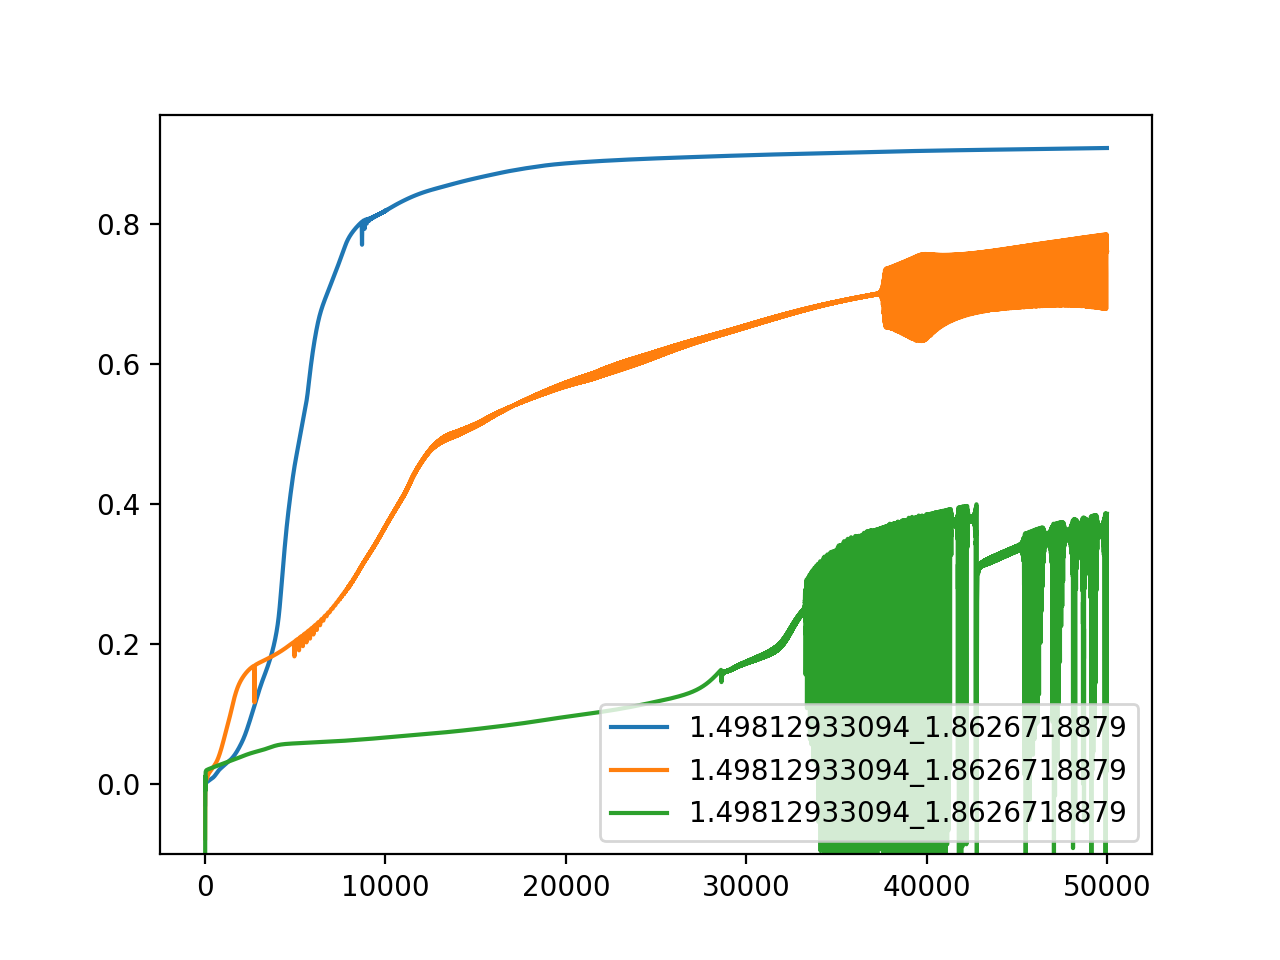

<IPython.core.display.Javascript object>


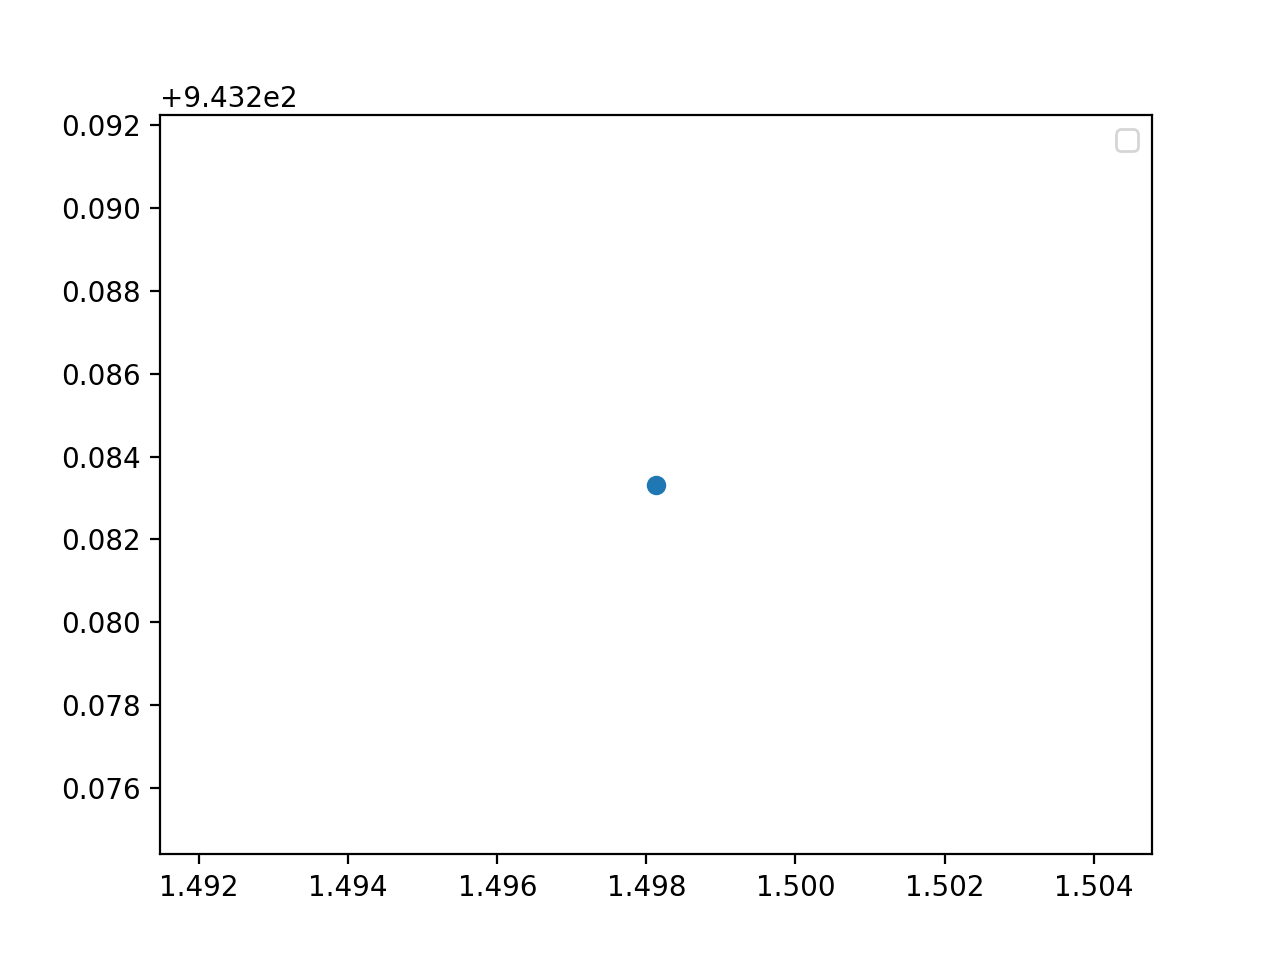

R1 is 1.49812933094, R2 is 1.8626718879, size is 899


HBox(children=(IntProgress(value=0, max=50000), HTML(value=u'')))

No handlers could be found for logger "matplotlib.legend"


R1 is 1.49812933094, R2 is 1.8626718879, size is 895


HBox(children=(IntProgress(value=0, max=50000), HTML(value=u'')))

R1 is 1.49812933094, R2 is 1.8626718879, size is 924


HBox(children=(IntProgress(value=0, max=50000), HTML(value=u'')))

In [5]:
# intialize graph
fig, ax = plt.subplots(1,1) # convergence speed history
l = []
fig2, ax2 = plt.subplots(1,1) # final loss history
l2 = []

# decision tree + neural network: benchmark ver: 0-0.33, 0.33-0.66, 0.66-0.99
def dt_nn_score_bench(R1=df.R.quantile(0.33), R2=df.R.quantile(0.66)): # or I could follow that x_train then parameter paradigm. but why bother?
    score = 0
    # we could have implemented a clean random forest, but it's pointless - how many days would hyperparameter tuning take?
    for index in (df.R < R1, np.logical_and(df.R > R1, df.R < R2), df.R > R2): 
        x = df.loc[index, ['x1','x2','x3']]
        y = df.loc[index, ['y']]
        print 'R1 is {}, R2 is {}, size is {}'.format(R1, R2, len(x))
        G = keras.models.Sequential([
            keras.layers.Dense(units=6, activation="tanh", input_shape=(3,)),
            keras.layers.Dense(units=18, activation="tanh"),
            keras.layers.Dense(units=12, activation="tanh"),
            keras.layers.Dense(units=1, activation=None)
        ])
        G.compile(loss='mse', optimizer=keras.optimizers.SGD(lr=0.01, momentum=0.91, nesterov=True), metrics=[r2_score])
        history = G.fit(
            x=x, y=y,
            epochs=50000, batch_size=X.shape[0], shuffle=True, 
            verbose=0, 
            callbacks=[
                        TqdmProgBar(n_epochs=50000, field='r2_score', fig=fig, ax=ax, label='{}_{}'.format(R1,R2))
            ]
        ) # approx 5 mins
        yhat = G.predict(x)
        score += np.sum(np.abs(yhat - y))
    ax2.scatter(R1, score)
    fig2.canvas.draw()
    l2.append((R1, R2, score))
    return score

# hyperparameter tuning
score = dt_nn_score_bench()



score

In [6]:
score

y    943.283319
dtype: float64

Strange. Seems the last part (tail) is hard to train. Why?

<IPython.core.display.Javascript object>


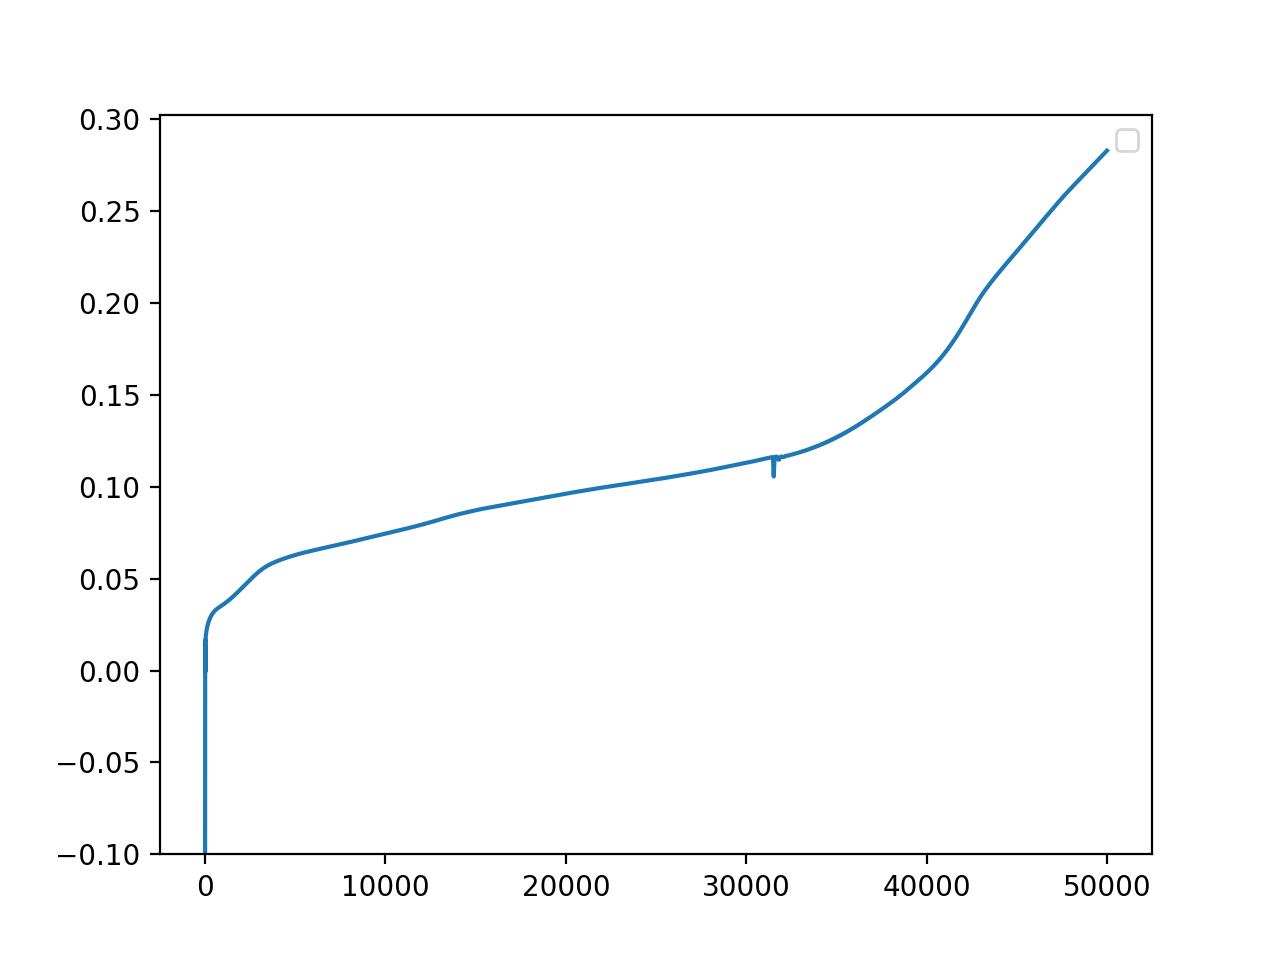

<IPython.core.display.Javascript object>


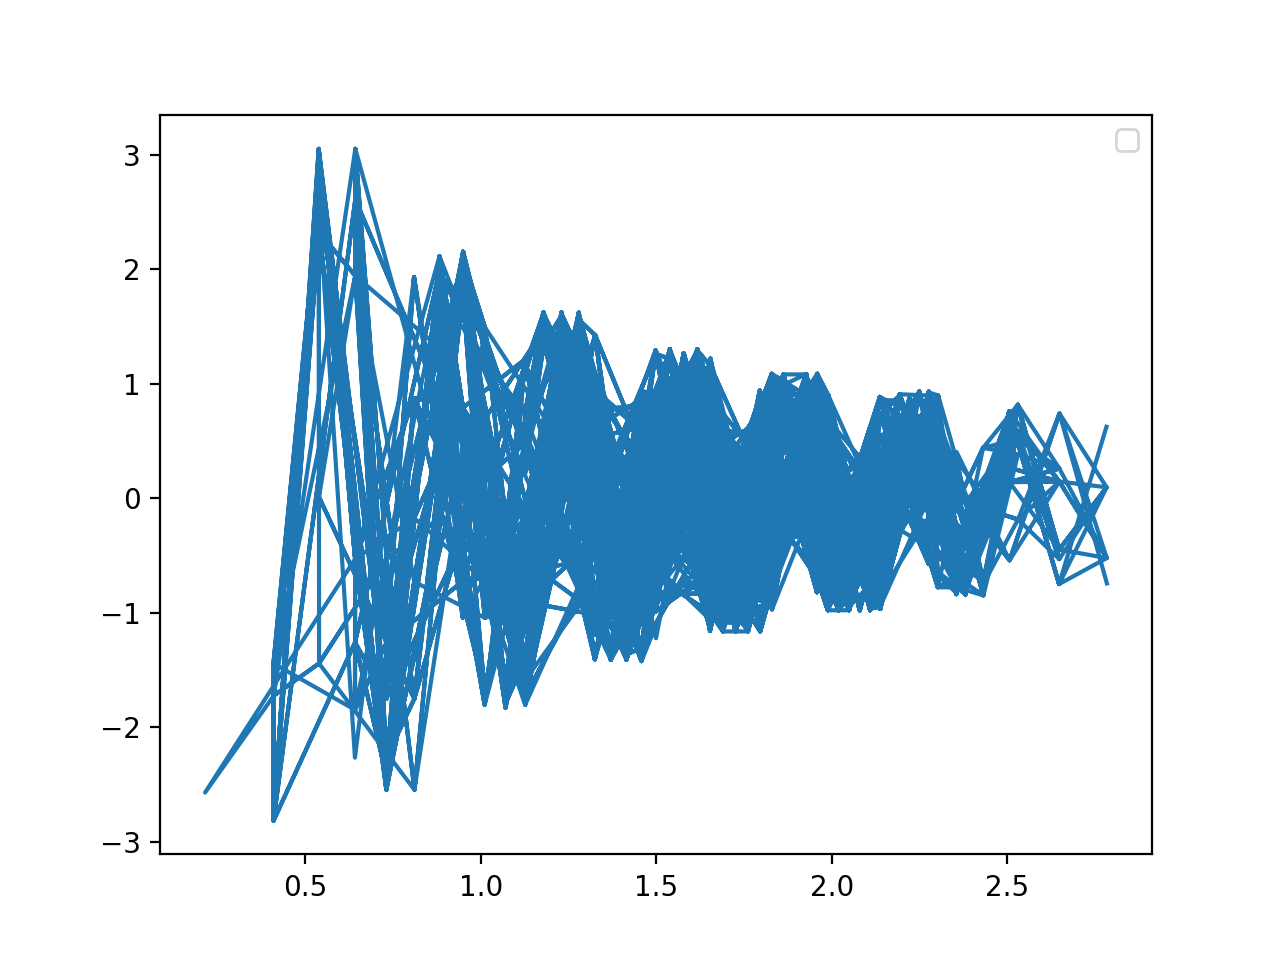

HBox(children=(IntProgress(value=0, max=50000), HTML(value=u'')))

In [10]:
fig, ax = plt.subplots(1,1) # convergence speed history
fig2, ax2 = plt.subplots(1,1) # final loss history

R2 = df.R.quantile(0.66)
index = df.R > R2
x = df.loc[index, ['x1','x2','x3']]
y = df.loc[index, ['y']]
G = keras.models.Sequential([
    keras.layers.Dense(units=6, activation="tanh", input_shape=(3,)),
    keras.layers.Dense(units=18, activation="tanh"),
    keras.layers.Dense(units=12, activation="tanh"),
    keras.layers.Dense(units=1, activation=None)
])
G.compile(loss='mse', optimizer=keras.optimizers.SGD(lr=0.01, momentum=0.91, nesterov=True), metrics=[r2_score])
history = G.fit(
    x=x, y=y,
    epochs=50000, batch_size=X.shape[0], shuffle=True, 
    verbose=0, 
    callbacks=[
                TqdmProgBar(n_epochs=50000, field='r2_score', fig=fig, ax=ax, label='')
    ]
) # approx 5 mins
yhat = G.predict(x)
score = np.sum(np.abs(yhat - y))

In [11]:
score

y    435.900834
dtype: float64

In [12]:
plt.plot(df.R, df.y)

Is it due to scaling?

<IPython.core.display.Javascript object>


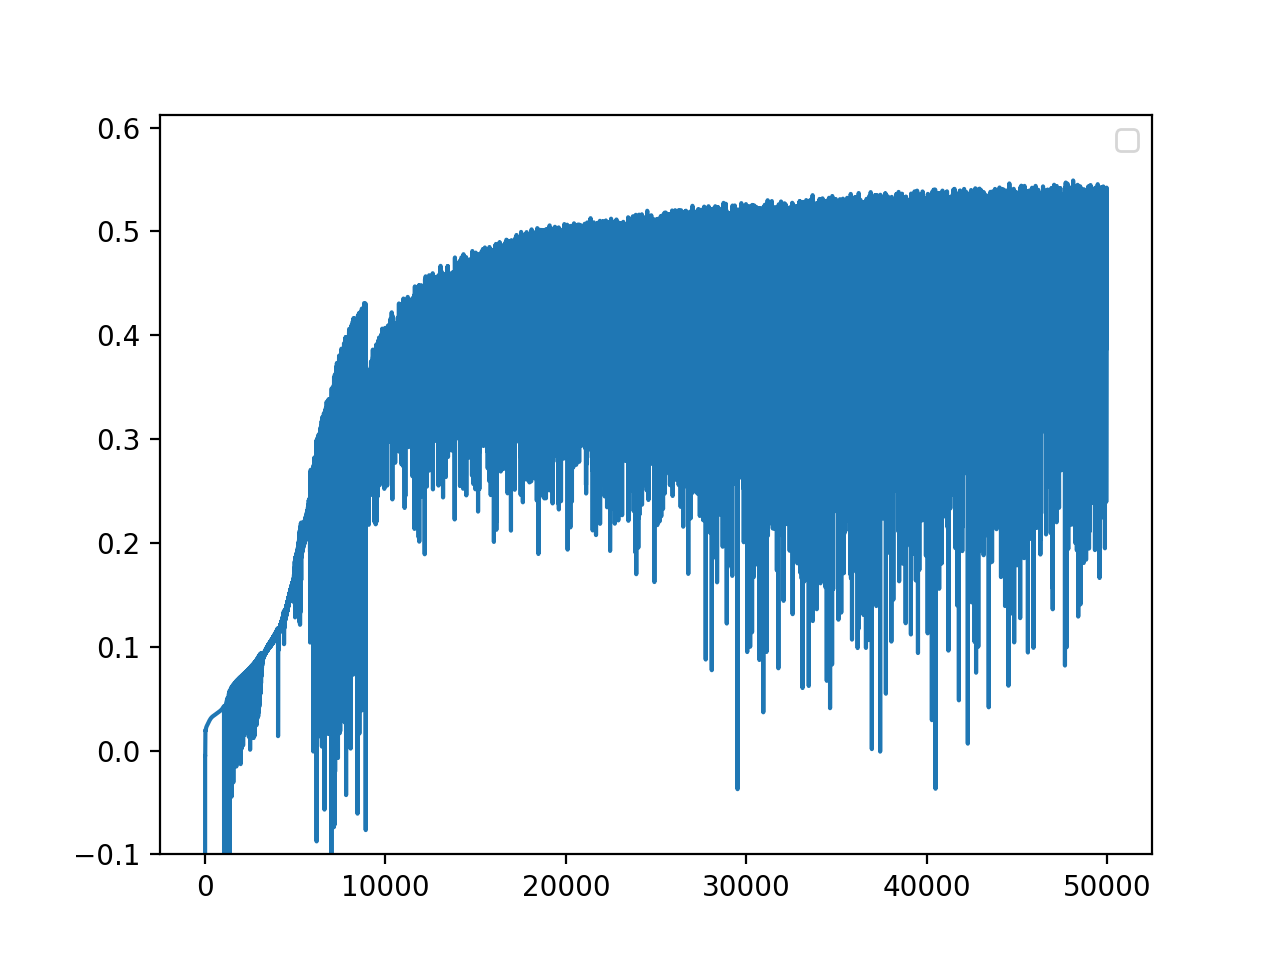

<IPython.core.display.Javascript object>


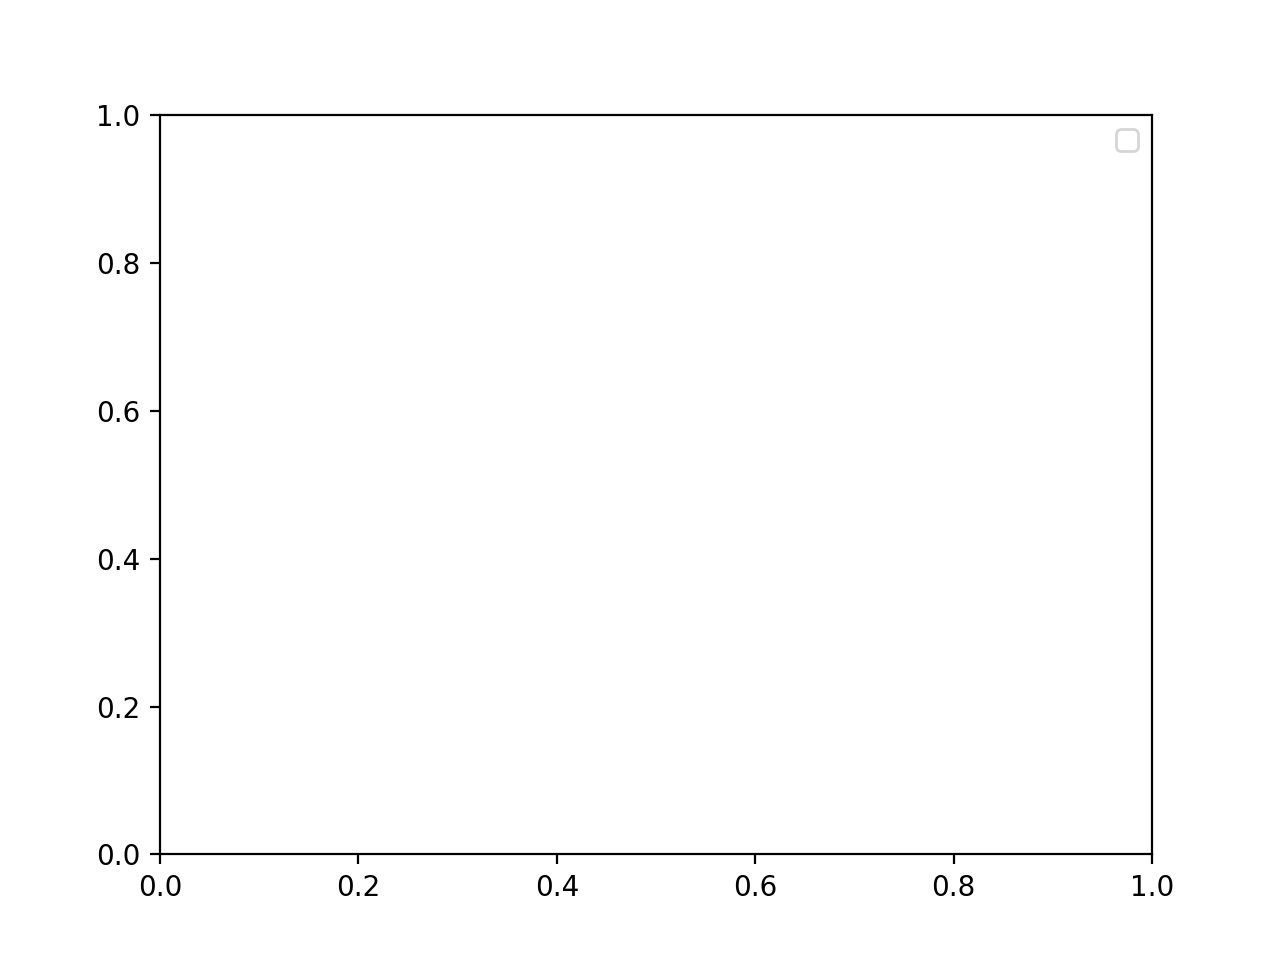

HBox(children=(IntProgress(value=0, max=50000), HTML(value=u'')))

In [15]:
fig, ax = plt.subplots(1,1) # convergence speed history
fig2, ax2 = plt.subplots(1,1) # final loss history

R2 = df.R.quantile(0.66)
index = df.R > R2
x = sklearn.preprocessing.scale(df.loc[index, ['x1','x2','x3']])
y = sklearn.preprocessing.scale(df.loc[index, ['y']])
G = keras.models.Sequential([
    keras.layers.Dense(units=6, activation="tanh", input_shape=(3,)),
    keras.layers.Dense(units=18, activation="tanh"),
    keras.layers.Dense(units=12, activation="tanh"),
    keras.layers.Dense(units=1, activation=None)
])
G.compile(loss='mse', optimizer=keras.optimizers.SGD(lr=0.05, momentum=0.91, nesterov=True), metrics=[r2_score])
history = G.fit(
    x=x, y=y,
    epochs=50000, batch_size=X.shape[0], shuffle=True, 
    verbose=0, 
    callbacks=[
                TqdmProgBar(n_epochs=50000, field='r2_score', fig=fig, ax=ax, label='')
    ]
) # approx 5 mins
yhat = G.predict(x)
score = np.sum(np.abs(yhat - y))

# Benchmark 2. A NN with thrice the number of parameters

<IPython.core.display.Javascript object>


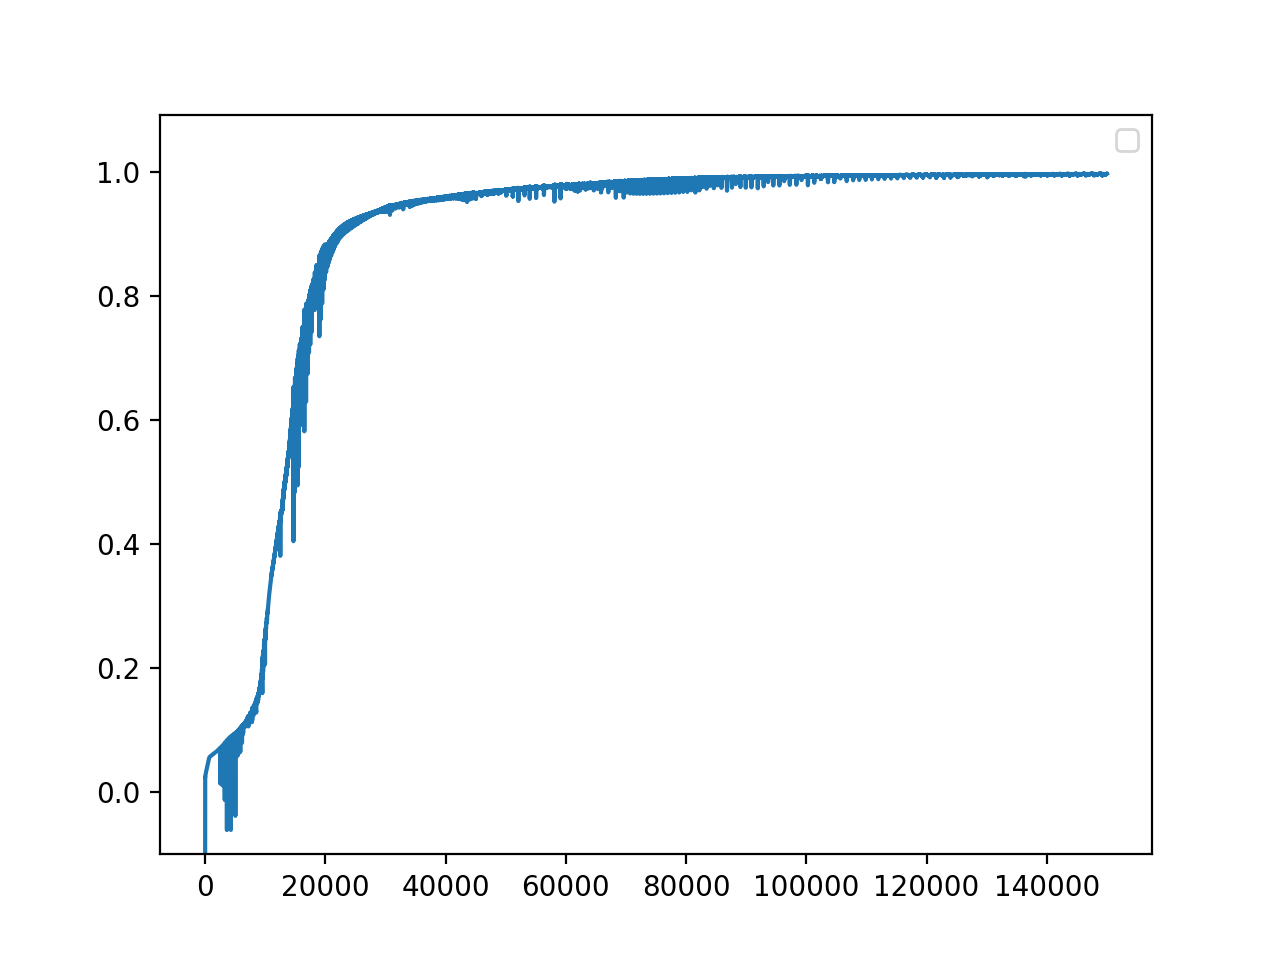

<IPython.core.display.Javascript object>


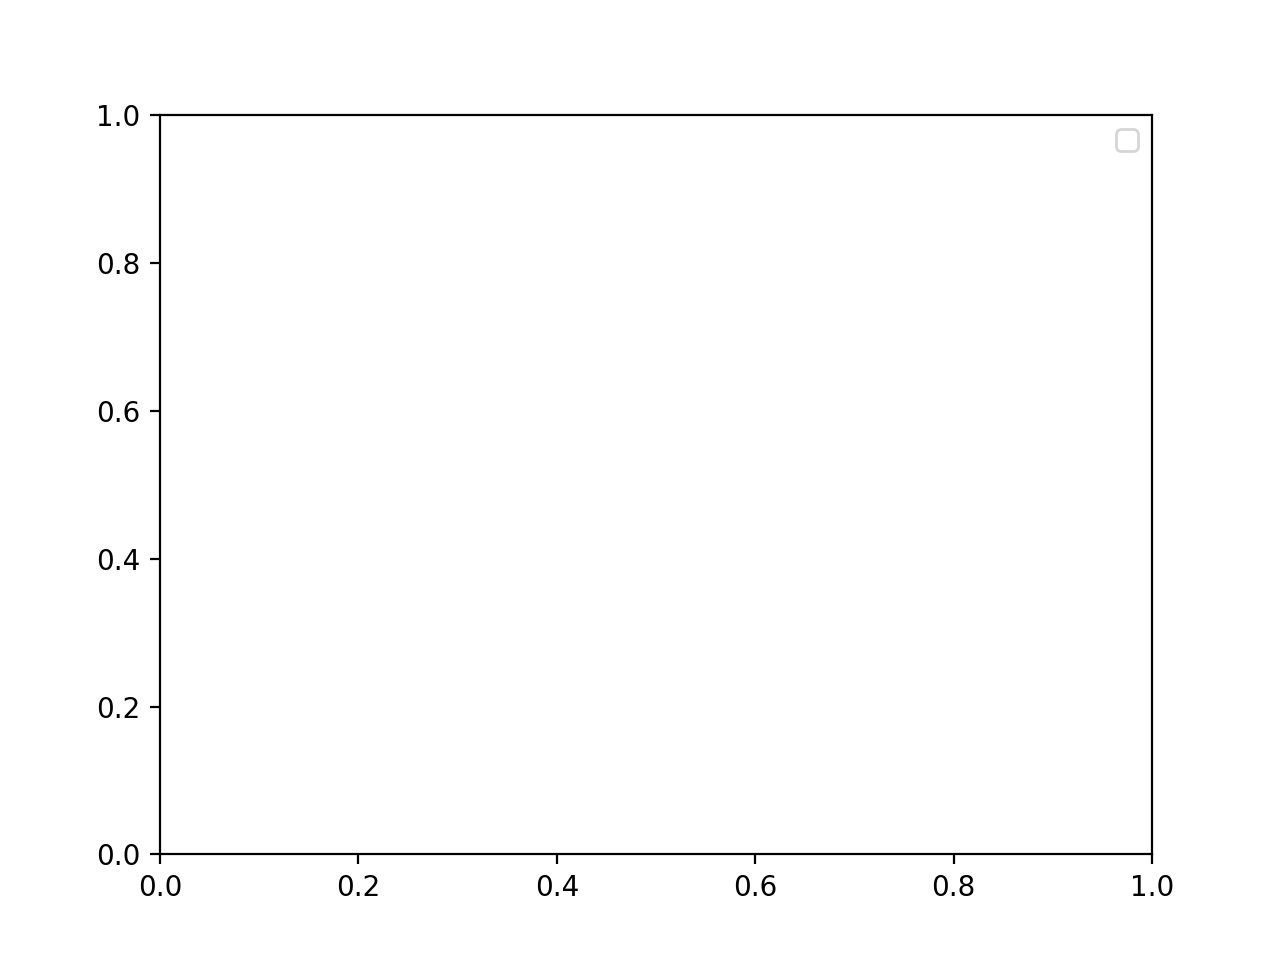

HBox(children=(IntProgress(value=0, max=150000), HTML(value=u'')))

In [17]:
fig, ax = plt.subplots(1,1) # convergence speed history
fig2, ax2 = plt.subplots(1,1) # final loss history

x = df.loc[index, ['x1','x2','x3']]
y = df.loc[index, ['y']]
G = keras.models.Sequential([
    keras.layers.Dense(units=15, activation="tanh", input_shape=(3,)),
    keras.layers.Dense(units=30, activation="tanh"),
    keras.layers.Dense(units=20, activation="tanh"),
    keras.layers.Dense(units=1, activation=None)
])
G.compile(loss='mse', optimizer=keras.optimizers.SGD(lr=0.03, momentum=0.91, nesterov=True), metrics=[r2_score])
history = G.fit(
    x=x, y=y,
    epochs=150000, batch_size=X.shape[0], shuffle=True, 
    verbose=0, 
    callbacks=[
                TqdmProgBar(n_epochs=150000, field='r2_score', fig=fig, ax=ax, label='')
    ]
) # approx 5 mins
yhat = G.predict(x)
score = np.sum(np.abs(yhat - y))

In [18]:
score

y    25.813222
dtype: float64